# Skip-gram Model with Simple Neural Network
# 
This notebook demonstrates training a **skip-gram model** using a basic neural network. We will:
1. Prepare the corpus and generate skip-gram pairs.
2. One-hot encode the words.
3. Organize data into Pandas DataFrames.
4. Train a neural network. 
5. Extract embedded word vectors.
6. Predict the next word in a sequence.


In [15]:
# ## 1. Import Libraries
import numpy as np
import pandas as pd
from simpleNNClass import NeuronalNet  # Custom neural network class

In [16]:
# ---
# ## 2. Define Corpus and Skip-gram Pair Generator

corpus = 'Die katze jagt den Hund und hat Angst vor der Maus'

def skipgram_pairs(corpus: str, size: int = 1):
    """
    Generate skip-gram pairs from a given corpus.
    
    Parameters:
        corpus (str): Input text corpus.
        size (int): Context window size (default=1).
    
    Returns:
        pairs (list): List of tuples (target_index, context_index)
        word_to_index (dict): Mapping of word -> index
    """
    tokens = corpus.lower().split()
    vocabulary = list(set(tokens))
    word_to_index = {word: i for i, word in enumerate(vocabulary)}
    pairs = []

    # Generate skip-gram pairs
    for index, target_word in enumerate(tokens):
        start = max(index - size, 0)
        end = min(index + size + 1, len(tokens))
        for i in range(start, end):
            if i != index:
                context_word = tokens[i]
                pairs.append((word_to_index[target_word], word_to_index[context_word]))

    return pairs, word_to_index

pairs, word_to_index = skipgram_pairs(corpus)
vocabulary = list(word_to_index.keys())
vocabulary_size = len(vocabulary)

print("Vocabulary:", vocabulary)
print("Skip-gram pairs (indices):", pairs)


Vocabulary: ['jagt', 'die', 'katze', 'und', 'hat', 'den', 'vor', 'maus', 'hund', 'der', 'angst']
Skip-gram pairs (indices): [(1, 2), (2, 1), (2, 0), (0, 2), (0, 5), (5, 0), (5, 8), (8, 5), (8, 3), (3, 8), (3, 4), (4, 3), (4, 10), (10, 4), (10, 6), (6, 10), (6, 9), (9, 6), (9, 7), (7, 9)]


In [17]:
# ---
# ## 3. One-hot Encoding Function

def one_hot_encoding(word_index, vocab_size):
    """
    Convert a word index into a one-hot encoded vector.
    
    Parameters:
        word_index (int): Index of the word.
        vocab_size (int): Size of the vocabulary.
    
    Returns:
        vector (np.array): One-hot encoded vector
    """
    vector = np.zeros(vocab_size)
    vector[word_index] = 1
    return vector


In [18]:
# ---
# ## 4. Prepare DataFrames for Training
# Each row contains the input (target word) and label (context word)

df = pd.DataFrame([{
    'Input': one_hot_encoding(word, vocabulary_size),
    'Label': one_hot_encoding(target, vocabulary_size)
} for word, target in pairs])

# Separate input and labels
X_train = df['Input']
y_train = df['Label'].apply(lambda x: pd.Series(x))

print("Training data preview:")
X_train.head(), y_train.head()


Training data preview:


(0    [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
 1    [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
 2    [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
 3    [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
 4    [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
 Name: Input, dtype: object,
     0    1    2    3    4    5    6    7    8    9    10
 0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 2  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 3  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 4  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0)

In [19]:
# ---
# ## 5. Initialize and Train Neural Network
# 
# Here we define a neural network with:
# - Input layer: size of vocabulary
# - Hidden layer: 100 nodes
# - Output layer: size of vocabulary
# - Learning rate: 0.1
neuron_net = NeuronalNet(input_nodes=vocabulary_size,
                          hidden_nodes=100,
                          output_nodes=vocabulary_size,
                          learning_rate=0.1)

# Train the network for 50 epochs
neuron_net.fit(X_train, y_train, epochs=60)



In [20]:
# ---
# ## 6. Extract Embedded Word Vectors
# 
# The learned weights between the input and hidden layer represent the **word embeddings**.

embedded_vectors = neuron_net.weights_input_hidden
print("Embedded Vectors:")
for word, idx in word_to_index.items():
    print(f"{word}: {embedded_vectors[idx]}")


Embedded Vectors:
jagt: [-0.33289458 -0.24408459 -0.39196057  0.29252954  0.05630495  0.51722744
  0.4814653  -0.12848272 -0.15909312  0.18482232 -0.3668317 ]
die: [-0.561499    0.22548386 -0.07748383  0.33507689 -0.46993966 -0.106491
 -0.04512251  0.44693989 -0.62873943  0.01159991  1.06134263]
katze: [ 0.76498742  0.44771077 -0.52904238 -0.24207372 -0.26109509 -0.37494554
 -0.35938951  0.1763154   0.5674242   0.60251783 -0.24251596]
und: [ 0.17488381 -0.8197503  -0.25608817 -0.26913693 -0.19396168  0.51569609
 -0.47607774  0.63427351  0.58310908 -0.02352937 -0.05663612]
hat: [ 0.50064506  1.1964583  -0.12231794  0.54542961 -0.04204884  0.7745559
 -0.16801242  0.06432881  0.60285571  0.40518253  0.31992286]
den: [-0.17747159 -0.14215708 -0.72424432 -0.07620901 -0.07684842 -0.57726373
  0.65072079  0.86686387 -0.4537965   0.20439395 -0.2448095 ]
vor: [-0.17326004  0.00364541  0.82045338  0.21761328  0.57562213  0.4611147
 -0.35069485 -0.37659732  0.02397705 -0.33255279 -0.17302424]
mau

In [21]:
# ---
# ## 7. Predict Next Words
# 
# Function to generate a sequence starting from an input word.

def predict_next_word(input_word, net, vocab):
    """
    Generate a sequence of words using the trained neural network.
    
    Parameters:
        input_word (str): Starting word
        net (NeuronalNet): Trained neural network
        vocab (list): Vocabulary list
    
    Returns:
        generated_output (str): Generated word sequence
    """
    generated_output = ''
    current_word = input_word.lower()

    for _ in range(vocabulary_size-1):
        input_vector = one_hot_encoding(vocab.index(current_word), len(vocab))
        df_input = pd.DataFrame([input_vector])
        predicted_idx = net.predict(df_input)[0]
        predicted_word = vocab[predicted_idx]
        generated_output += predicted_word + ' '
        current_word = predicted_word

    return generated_output.strip()

input_word = 'die'
output_sequence = predict_next_word(input_word, neuron_net, vocabulary)
print(f"\nStarting from '{input_word}' → generated sequence:\n{output_sequence}")



Starting from 'die' → generated sequence:
katze jagt den hund und hat angst vor der maus


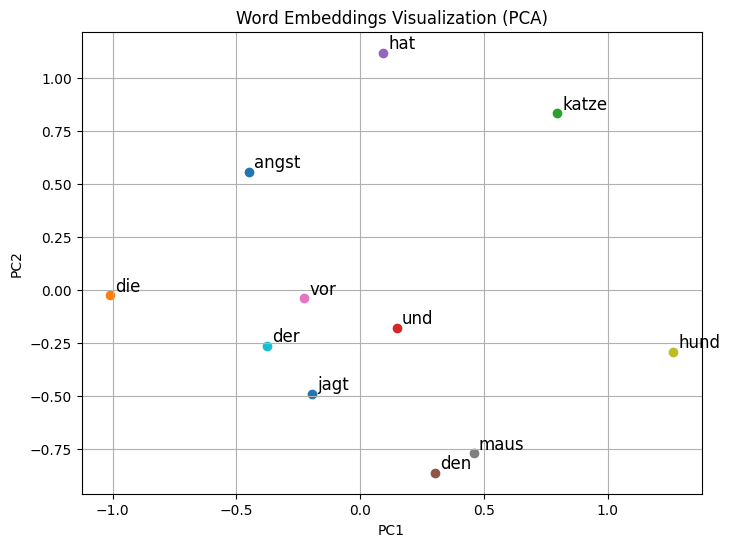

In [22]:
# ---
# ## 8. Visualize Word Embeddings (PCA)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions from hidden layer (100) → 2D
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(embedded_vectors)

# Plot embeddings
plt.figure(figsize=(8, 6))
for word, idx in word_to_index.items():
    x, y = reduced_vectors[idx]
    plt.scatter(x, y)
    plt.text(x + 0.02, y + 0.02, word, fontsize=12)

plt.title("Word Embeddings Visualization (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()
